# Spectral Estimation of Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Rafael Mejía Zuluaga
## rmejiaz@unal.edu.co

## The Periodogram

The [periodogram](https://en.wikipedia.org/wiki/Spectral_density_estimation#Periodogram) is an estimator for the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a random signal $x[k]$. For the following it is assumed that $x[k]$ is drawn from a wide-sense ergodic real-valued random process.

### Definition

The PSD is defined as the [discrete-time Fourier transformation (DTFT) of the auto-correlation function (ACF)](../random_signals/power_spectral_densities.ipynb#Definition)

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ \varphi_{xx}[\kappa] \}
\end{equation}

Hence, the PSD can be computed from an estimate of the ACF. Let's assume that we want to estimate the PSD from $N$ samples of the random signal $x[k]$ by way of the ACF. The signal $x[k]$ is truncated to $N$ samples by multiplication (windowing) with the rectangular signal $\text{rect}_N[k]$ of length $N$

\begin{equation}
x_N[k] = x[k] \cdot \text{rect}_N[k]
\end{equation}

where $x_N[k]$ denotes the truncated signal.
The ACF is estimated by applying its definition in a straightforward manner. For a random signal $x_N[k]$ of finite length, the estimated ACF $\hat{\varphi}_{xx}[\kappa]$ can be expressed [in terms of a convolution](../random_signals/correlation_functions.ipynb#Definition)

\begin{equation}
\hat{\varphi}_{xx}[\kappa] = \frac{1}{N} \cdot x_N[k] * x_N[-k]
\end{equation}

Applying the DTFT to both sides and rearranging the terms yields

\begin{equation}
\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \, X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})\, X_N(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) = 
\frac{1}{N} \, | X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2
\end{equation}

where the intermediate and last equalities result from the symmetry relations of the DTFT. This estimate of the PSD is known as the periodogram. It can be computed directly from the DTFT

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k=0}^{N-1} x_N[k] \, \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k}
\end{equation}

of the truncated random signal.

### Example - Periodogram

The following example estimates the PSD of a random process which draws samples from normal distributed white noise with zero mean and unit variance. The true PSD is hence given as $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$. In order to compute the periodogram by the discrete Fourier transformation (DFT), the signal $x[k]$ has to be zero-padded to ensure that squaring (multiplying) the spectra does not result in a circular convolution.

Mean value of the periodogram: 1.024
Variance of the periodogram: 0.791


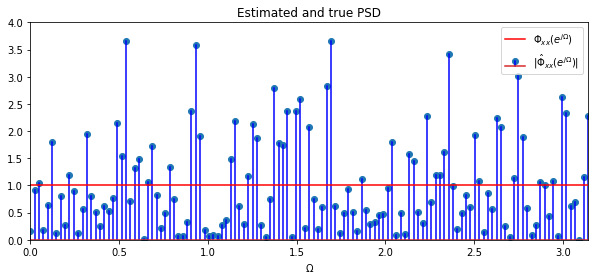

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 128  # number of samples

# generate random signal
np.random.seed(5)
x = np.random.normal(size=N)

# compute magnitude of the periodogram
x = np.concatenate((x, np.zeros_like(x)))
X = np.fft.rfft(x)
Om = np.linspace(0, np.pi, len(X))
Sxx = 1/N * abs(X)**2

# plot results
plt.figure(figsize=(10,4))
plt.stem(Om, Sxx, 'b', label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
plt.plot(Om, np.ones_like(Sxx), 'r', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated and true PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 4])
plt.legend()

# compute mean value of the periodogram
print('Mean value of the periodogram: {0:1.3f}'.format(np.mean(np.abs(Sxx))))
print('Variance of the periodogram: {0:1.3f}'.format(np.var(np.abs(Sxx))))

**Exercise**

* What do you have to change to evaluate experimentally if the periodogram is a consistent estimator?
* Based on the results, is the periodogram a consistent estimator?

Solution: The conditions for consistency have to be checked for the limiting case of a infinitely long signal ($N \to \infty$). Increasing the length `N` of the random signal in above example reveals that the periodogram can be assumed to be bias free, $b_{\hat{\Phi}_{xx}} = 0$. However, its variance $\sigma^2_{\hat{\Phi}_{xx}}$ does not tend to zero. The reason for this is that by increasing the length $N$ of the random signal also the number of spectral coefficients is increased by the same amount.

Las condiciones para evaluar la consistencia de un estimador se calculan par el caso en el que el número de muestras tiende a infinito. Podemos aumentar el número de muestras y ver el comportamiento de la PSD calculada:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import warnings

warnings.filterwarnings('ignore')


@interact(N = (7,11,1))

def interactive(N = 7):
  N = 2**N

  print(f"{N} Samples")

  # generate random signal
  np.random.seed(5)
  x = np.random.normal(size=N)

  # compute magnitude of the periodogram
  x = np.concatenate((x, np.zeros_like(x)))
  X = np.fft.rfft(x)
  Om = np.linspace(0, np.pi, len(X))
  Sxx = 1/N * abs(X)**2

  # plot results
  plt.figure(figsize=(10,4))
  plt.stem(Om, Sxx, 'b', label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
  plt.plot(Om, np.ones_like(Sxx), 'r', label=r'$\Phi_{xx}(e^{j \Omega})$')
  plt.title('Estimated and true PSD')
  plt.xlabel(r'$\Omega$')
  plt.axis([0, np.pi, 0, 4])
  plt.legend()

  # compute mean value of the periodogram
  print('Mean value of the periodogram: {0:1.3f}'.format(np.mean(np.abs(Sxx))))
  print('Variance of the periodogram: {0:1.3f}'.format(np.var(np.abs(Sxx))))

interactive(children=(IntSlider(value=7, description='N', max=11, min=7), Output()), _dom_classes=('widget-int…

Como podemos ver, a pesar de que la media de la PSD tiende a 1, la varianza no tiende a cero. Por lo que se puede decir que el periodograma no es un estimador consistente.

### Evaluation

From above numerical example it should have become clear that the periodogram is no consistent estimator for the PSD $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. It can be shown that the estimator is asymptotically bias free for $N \to \infty$, hence

\begin{equation}
\lim_{N \to \infty} E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})  \} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

This is due to the [leakage effect](../spectral_analysis_deterministic_signals/leakage_effect.ipynb) which limits the spectral resolution for signals of finite length.

The variance of the estimator does not converge towards zero

\begin{equation}
\lim_{N \to \infty} \sigma^2_{\hat{\Phi}_{xx}} \neq 0
\end{equation}

This is due to the fact that by increasing $N$ also the number of independent frequencies $\Omega = \frac{2 \pi}{N} \mu$ for $\mu = 0,1,\dots,N-1$ increases.

The periodogram is the basis for a variety of advanced estimation techniques for the PSD. These techniques rely on averaging or smoothing of (overlapping) periodograms.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.